In [1]:
#Libraries for math and data manipulation
import numpy as np
import pandas as pd
import copy
import math
import numpy.random as rand
import scipy as sp
import sys
from datetime import datetime

#Plotting stuff
import matplotlib.pyplot as plt
import seaborn
import corner
%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True) #Want to be able to use tex in the plot labels
seaborn.set_style('ticks')
seaborn.set_color_codes()

#Machine learning stuff
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier   #This is a single decision tree
from sklearn.ensemble import ExtraTreesClassifier #Random forest of trees
import graphviz                                   #This package lets you visualize the tree
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, precision_score
from sklearn.model_selection import train_test_split

In [50]:
def datamap(df,params):
    #Adjust some things that are always included and may need to be used:
    df['dimain'] = clin_df.dimain.map({"Cerebral Malaria":0, "Meningoencephalitis":1, "Meningitis":2.,\
                                       "Other":3})
    for label in params:
        #Mapping yes/no to 1/0
        if label =='date':
            df['incdate'] = pd.to_datetime(df['incdate'])
            df['date'] = (df['incdate'] - df['incdate'].min())  / np.timedelta64(1,'D')
        if label=='clinjaund':
            df[label] = df.clinjaund.map({'Yes': 1, 'No': 0})
        if label=='clinhepato':
            df[label] = df.clinhepato.map({'Yes': 1, 'No': 0})
        if label=='clinspleno':
            df[label] = df.clinspleno.map({'Yes': 1, 'No': 0})
        if label=='clinconv':
            df['clinconv'] = df.clinconv.map({'Yes': 1, 'No': 0})
        if label=='clindehyd':
            df['clindehyd'] = df.clindehyd.map({'Yes': 1, 'No': 0})
        if label=='clinnoedem':
            df['clinoedem'] = df.clinoedem.map({'Yes': 1, 'No': 0})
        if label=='clinlymph':
            df['clinlymph'] = df.clinlymph.map({'Yes': 1, 'No': 0})
        if label=='clinresp':
            df['clinresp'] = df.clinresp.map({'Yes': 1, 'No': 0})
        if label=='clinablung':    
            df['clinablung'] = df.clinablung.map({'Yes': 1, 'No': 0})
        if label=='clincyan':
            df['clincyan'] = df.clincyan.map({'Yes': 1, 'No': 0})
        if label=='clincapref':
            df['clincapref'] = df.clincapref.map({'Yes': 1, 'No': 0})
        if label=='clincoldext':
            df['clincoldext'] = df.clincoldext.map({'Yes': 1, 'No': 0})
        if label=='clinorcand':
            df['clinorcand'] = df.clinorcand.map({'Yes': 1, 'No': 0})
        if label=='clinhemmor':
            df['clinhemmor'] = df.clinhemmor.map({'Yes': 1, 'No': 0})
        if label=='clinaids':
            df['clinaids'] = df.clinaids.map({'Yes': 1, 'No': 0})
        if label=='vom':
            df['vom'] = df.vom.map({'Yes': 1, 'No': 0})
        if label=='diar':
            df['diar'] = df.diar.map({'Yes': 1, 'No': 0})
        if label=='headache':
            df['headache'] = df['head'] #Since 'head' is a function
            df['headache'] = df.headache.map({"Don't know":0, 'No':0, 'Yes':1, 'Not applicable':0})
        if label=='conv':
            df['conv'] = df.conv.map({'Yes': 1, 'No': 0})
        if label=='age':
            df['ageym'] = df.ageyrs.astype(float)*12.
            df['agemth'] = df.agemth.astype(float)
            df['age'] = df.ageym + df.agemth #total age in months

        #Medical history variables
        if label=='mhhosp':
            df['mhhosp'] = df.mhhosp.map({'Yes': 1, 'No':0})

        #some slightly more compliated mappings
        if label=='abdpain':
            df['abdpain'] = df.abdpain.map({"Don't know":0, 'No':0, 'Yes':1, 'Not applicable':np.nan})
        if label=='muscle':
            df['muscle'] = df.muscle.map({"Don't know":0, 'No':0, 'Yes':1, 'Not applicable':np.nan})
        if label=='mhdevsp':
            df['mhdevsp'] = df.mhdevsp.map({'OTHER':1, 'GLOBAL DEVELOPMENTAL DELAY':1, 'HYDROCEPHALUS':1,
                   'HEARING LOSSES':1, 'MOTOR DEVELOPEMENTAL DELAY':1,
                   'SPEECH DEVELOPEMENTAL DELAY':1})

        #Mapping of inclusion variables 6-8 MLW
        if label=='incirrit':
            df['incirrit'] = df.incirrit.map({"Don't know":0, 'No':0, 'Yes':1, 'Not applicable':0})
        if label=='inchead':
            df['inchead'] = df.inchead.map({"Don't know":0, 'No':0, 'Yes':1, 'Not applicable':0})
        if label=='incphoto':
            df['incphoto'] = df.incphoto.map({"Don't know":0, 'No':0, 'Yes':1, 'Not applicable':0})
        if label=='incfont':
            df['incfont'] = df.incfont.map({"Don't know":0, 'No':0, 'Yes':1, 'Not applicable':0})
        if label=='incneuro':
            df['incneuro'] = df.incneuro.map({"Don't know":0, 'No':0, 'Yes':1, 'Not applicable':0})
        if label=='incseiza':
            df['incseiza'] = df.incseiza.map({"Don't know":0, 'No':0, 'Yes':1, 'Not applicable':0})
        if label=='incseizh':
            df['incseizh'] = df.incseizh.map({"Don't know":0, 'No':0, 'Yes':1, 'Not applicable':0})
        if label=='incpurp':
            df['incpurp'] = df.incpurp.map({"Don't know":0, 'No':0, 'Yes':1, 'Not applicable':0})

        #Malaria diagnostic
        if label=='malaria':
            df['malaria'] = df.malaria.map({'confirmed':2,'probable':1,'no':0})
        
        #Initial diagnosis coding:
        if label=='CMalaria':
            df['CMalaria'] = df.dimain.map({0:1,1:0,2:0,3:0})
        if label=='Enceph':
            df['Enceph'] = df.dimain.map({0:0,1:1,2:0,3:0})
        if label=='Mening':
            df['Mening'] = df.dimain.map({0:0,1:0,2:1,3:0})
        if label=='Other':
            df['Other'] = df.dimain.map({0:0,1:0,2:0,3:1})


        #This coding is going to be important. You'll want to figure out which categories are useful, and which
        #are practical.
        if label=='diag':
            df['diag'] = df.diag.map({'malaria':0, 'cereb malaria':0,'virus-malaria':0,\
                                                'virus-bacteria':1, 'bacteremia':1,'bact meningitis':1,\
                                                'virus-other':2,'virus':2,'malaria-bacterial':3,\
                                                'tb':3,'crypto':2, '0.0':4})


In [51]:
data_raw = pd.read_csv("../Data/cns_data.csv")   #Using Pandas for data manipulation

In [52]:
#Delete useless columns - but keep patient registration number
data_df = data_raw.drop(['surnamenam','patinit','mothinit'],axis=1)

In [53]:
#Split up 'incdate' into month, day, and year. Monthday is meant to capture seasonality.
data_df['month'] = pd.DatetimeIndex(data_df['incdate']).month
data_df['day'] = pd.DatetimeIndex(data_df['incdate']).day
data_df['year'] = pd.DatetimeIndex(data_df['incdate']).year
data_df['monthday'] = data_df['month']*30+data_df['day']

In [54]:
#Select input features
#6-8 adding inclusion criteria and rdttest MLW
clin_df = data_df.loc[:,['glasgtot','blanttot','clinjaund','clinhepato','clinspleno','clinconv','clindehyd',\
                          'clinoedem','clinlymph','clinresp','clinablung','clincyan','clincapref','clincoldext',\
                         'clinearinf','clinanemia','clinorcand','clinhemmor','clinaids',\
                         'abdpain','vom','diar','head','muscle','conv',\
                         'sex','ageyrs','agemth',\
                         'temp','card','resp','sbp','dbp','weight','height','muac',\
                          'mhhosp', 'mhdevsp', 'mhsickle', 'mhchronstat',\
                         'incdate',\
                         'dimain', \
                         'incirrit', 'inchead', 'incphoto',\
                         'incfont', 'incneuro' , 'incseiza', 'incseizh','incpurp',\
                         'ident',\
                          'diag']] #This is the final diagnosis - will be the 'label'

In [55]:
#Convert the date into a useful value. This just counts the days from the beginning of the dataset 
clin_df['incdate'] = pd.to_datetime(clin_df['incdate'])
clin_df['date'] = (clin_df['incdate'] - clin_df['incdate'].min())  / np.timedelta64(1,'D')

#Mapping yes/no to 1/0
clin_df['clinjaund'] = clin_df.clinjaund.map({'Yes': 1, 'No': 0})
clin_df['clinhepato'] = clin_df.clinhepato.map({'Yes': 1, 'No': 0})
clin_df['clinspleno'] = clin_df.clinspleno.map({'Yes': 1, 'No': 0})
clin_df['clinconv'] = clin_df.clinconv.map({'Yes': 1, 'No': 0})
clin_df['clindehyd'] = clin_df.clindehyd.map({'Yes': 1, 'No': 0})
clin_df['clinoedem'] = clin_df.clinoedem.map({'Yes': 1, 'No': 0})
clin_df['clinlymph'] = clin_df.clinlymph.map({'Yes': 1, 'No': 0})
clin_df['clinresp'] = clin_df.clinresp.map({'Yes': 1, 'No': 0})
clin_df['clinablung'] = clin_df.clinablung.map({'Yes': 1, 'No': 0})
clin_df['clincyan'] = clin_df.clincyan.map({'Yes': 1, 'No': 0})
clin_df['clincapref'] = clin_df.clincapref.map({'Yes': 1, 'No': 0})
clin_df['clincoldext'] = clin_df.clincoldext.map({'Yes': 1, 'No': 0})
clin_df['clinorcand'] = clin_df.clinorcand.map({'Yes': 1, 'No': 0})
clin_df['clinhemmor'] = clin_df.clinhemmor.map({'Yes': 1, 'No': 0})
clin_df['clinaids'] = clin_df.clinaids.map({'Yes': 1, 'No': 0})
clin_df['vom'] = clin_df.vom.map({'Yes': 1, 'No': 0})
clin_df['diar'] = clin_df.diar.map({'Yes': 1, 'No': 0})
clin_df['headache'] = clin_df['head'] #Since 'head' is a function
clin_df['conv'] = clin_df.conv.map({'Yes': 1, 'No': 0})
clin_df['ageym'] = clin_df.ageyrs.astype(float)*12.
clin_df.agemth = clin_df.agemth.astype(float)
clin_df['age'] = clin_df.ageym + clin_df.agemth #total age in months

#Medical history variables
clin_df['mhhosp'] = clin_df.mhhosp.map({'Yes': 1, 'No':0})

#some slightly more compliated mappings
clin_df['abdpain'] = clin_df.abdpain.map({"Don't know":0, 'No':0, 'Yes':1, 'Not applicable':np.nan})
clin_df['headache'] = clin_df.headache.map({"Don't know":0, 'No':0, 'Yes':1, 'Not applicable':0})
clin_df['muscle'] = clin_df.muscle.map({"Don't know":0, 'No':0, 'Yes':1, 'Not applicable':np.nan})
clin_df['dimain'] = clin_df.dimain.map({"Cerebral Malaria":0, "Meningoencephalitis":1, "Meningitis":2.,\
                                       "Other":3})
clin_df['mhdevsp'] = clin_df.mhdevsp.map({'OTHER':1, 'GLOBAL DEVELOPMENTAL DELAY':1, 'HYDROCEPHALUS':1,
       'HEARING LOSSES':1, 'MOTOR DEVELOPEMENTAL DELAY':1,
       'SPEECH DEVELOPEMENTAL DELAY':1})

#Mapping of inclusion variables 6-8 
clin_df['incirrit'] = clin_df.incirrit.map({"Don't know":0, 'No':0, 'Yes':1, 'Not applicable':0})
clin_df['inchead'] = clin_df.inchead.map({"Don't know":0, 'No':0, 'Yes':1, 'Not applicable':0})
clin_df['incphoto'] = clin_df.incphoto.map({"Don't know":0, 'No':0, 'Yes':1, 'Not applicable':0})
clin_df['incfont'] = clin_df.incfont.map({"Don't know":0, 'No':0, 'Yes':1, 'Not applicable':0})
clin_df['incneuro'] = clin_df.incneuro.map({"Don't know":0, 'No':0, 'Yes':1, 'Not applicable':0})
clin_df['incseiza'] = clin_df.incseiza.map({"Don't know":0, 'No':0, 'Yes':1, 'Not applicable':0})
clin_df['incseizh'] = clin_df.incseizh.map({"Don't know":0, 'No':0, 'Yes':1, 'Not applicable':0})
clin_df['incpurp'] = clin_df.incpurp.map({"Don't know":0, 'No':0, 'Yes':1, 'Not applicable':0})

#This coding is going to be important. You'll want to figure out which categories are useful, and which
#are practical.
clin_df['diag'] = clin_df.diag.map({'malaria':0, 'cereb malaria':0,'virus-malaria':0,\
                                    'virus-bacteria':1, 'bacteremia':1,'bact meningitis':1,\
                                    'virus-other':2,'virus':2,'malaria-bacterial':3,\
                                    'tb':3,'crypto':2, '0.0':4})

In [56]:
#A lot of these have very few actual answers. i.e., 'headache.' Mapping 'NaN' to 'No'. 
values = {'clinjaund':0,'clinhepato':0,'clinaids':0,'clinhemmor':0,'clinorcand':0,\
          'clinresp':0,'clinlymph':0,'clindehyd':0,'clinoedem':0,'clinablung':0,'clincyan':0,'clincapref':0,
          'clincoldext':0, 'mhchronstat':0, 'mhdevsp':0,\
         'conv':0,'abdpain':0,'vom':0,'diar':0,'headache':0,'muscle':0}
clin_df = clin_df.fillna(value=values)

In [57]:
#You really shouldn't use the initial diagnosis as a continuous variable ,
#you need to map it into a set of yes/no question.
clin_df['CMalaria'] = clin_df.dimain.map({0:1,1:0,2:0,3:0})
clin_df['Enceph'] = clin_df.dimain.map({0:0,1:1,2:0,3:0})
clin_df['Mening'] = clin_df.dimain.map({0:0,1:0,2:1,3:0})
clin_df['Other'] = clin_df.dimain.map({0:0,1:0,2:0,3:1})

print(clin_df.dimain.unique())

[ 0.  1.  2.  3.]


In [205]:
#Pick the features to classify with.
Xlabels = ['CMalaria','Enceph','Mening','Other',\
                      'headache','age','temp',\
                      'date',\
                      'clinjaund','clinhepato','clinaids','clinhemmor','clinorcand',\
                      'clinresp','clinlymph','clindehyd','clinoedem','clinablung','clincyan','clincapref',\
                      'glasgtot', 'dbp', 'sbp','resp','card','weight','height','muac',\
                      'mhhosp','mhchronstat', 'mhdevsp',\
                      'conv','abdpain','vom','diar','muscle',\
                      'incirrit', 'inchead', 'incphoto',\
                      'incfont', 'incneuro' , 'incseiza', 'incseizh',\
                      'incpurp',\
                      'ident'] 
X_pd = clin_df.loc[:,['CMalaria','Enceph','Mening','Other',\
                      'headache','age','temp',\
                      'date',\
                      'clinjaund','clinhepato','clinaids','clinhemmor','clinorcand',\
                      'clinresp','clinlymph','clindehyd','clinoedem','clinablung','clincyan','clincapref',\
                      'glasgtot', 'dbp', 'sbp','resp','card','weight','height','muac',\
                      'mhhosp','mhchronstat', 'mhdevsp',\
                      'conv','abdpain','vom','diar','muscle',\
                       'incirrit', 'inchead', 'incphoto',\
                      'incfont', 'incneuro' , 'incseiza', 'incseizh',\
                      'incpurp',\
                      'ident',\
                      'diag']]
X_pd = X_pd.dropna()  #Drop cases that have nan for *any* entry

#Get things into the correct format for scikit-learn. I've tried to use the convention throughout that variables
#ending in 'pd' are pandas dataframes.
Input = X_pd.values             #creates a numpy array
Features = Input[:,0:-1].copy() #separate the features and labels - exclude patient id number
Labels = Input[:,-1].copy()
ncase = len(Input[:,0])
print(np.shape(Features))                     #checking that there are a reasonable number of cases left


X = Features.copy()  #changing to X and y. For no real reason
y = Labels.copy()

#skl will split the data into training and test for you. Right now, I'm training on 4/5 of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=True)
y_train = y_train.astype(float)
y_test = y_test.astype(float)
#You need to use the same test and train sets here.
ntrain = 281
X_train = X[:ntrain,:]
y_train = y[:ntrain]

X_test = X[ntrain:,:]
y_test = y[ntrain:]

#Actual classifier. This is doing n_estimators trees, up to max_depth cuts. Something to play with.
forest = ExtraTreesClassifier(n_estimators=20,
                              random_state=0,max_depth=10)

#Fit the classifier.
forest.fit(X_train[:,:-1], y_train)

#extract the 'importances' of the features
importances = forest.feature_importances_
#calculate standard deviation
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
Xlabels = np.array(Xlabels)
PlotLabels = Xlabels[indices]

(361, 45)


In [206]:
print PlotLabels

['CMalaria' 'Enceph' 'Mening' 'glasgtot' 'date' 'card' 'muac' 'weight'
 'incirrit' 'resp' 'dbp' 'height' 'temp' 'clinhepato' 'age' 'clindehyd'
 'sbp' 'clinablung' 'clinjaund' 'mhhosp' 'inchead' 'clinaids' 'vom' 'Other'
 'incseizh' 'clinresp' 'headache' 'abdpain' 'incseiza' 'muscle' 'conv'
 'clinorcand' 'diar' 'incfont' 'incphoto' 'incneuro' 'mhchronstat'
 'clincapref' 'clinlymph' 'clinoedem' 'clinhemmor' 'mhdevsp' 'clincyan'
 'incpurp']


In [207]:
#Make the predictions on the test data
y_pred_prob = forest.predict_proba(X_test[:,:-1])
y_pred = forest.predict(X_test[:,:-1])

In [208]:
#Print the confusion matrix:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[33  0  0  0  4]
 [ 0  2  0  0  8]
 [ 1  1  0  0  1]
 [ 0  0  0  0  1]
 [ 1  6  0  0 22]]
             precision    recall  f1-score   support

        0.0       0.94      0.89      0.92        37
        1.0       0.22      0.20      0.21        10
        2.0       0.00      0.00      0.00         3
        3.0       0.00      0.00      0.00         1
        4.0       0.61      0.76      0.68        29

avg / total       0.69      0.71      0.70        80



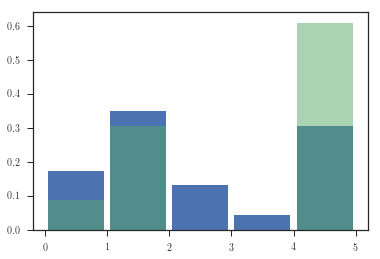

In [209]:
mask = []
i = 0
for yt in y_test:
    yp = y_pred[i]
    mv = yp==yt
    mask.append(mv)
    i +=1
mask = np.invert(mask)

missed_pat = X_test[mask]
missed_pat_diag = y_test[mask]
missed_pat_id = X_test[mask,-1]


a,b,c = plt.hist(missed_pat_diag, bins=bins, density=True,rwidth=0.9)
d,e,f = plt.hist(y_pred[mask],bins=bins,density=True,rwidth=0.9,alpha=0.5)

In [157]:
#Now, do this again - but get rid of the clinical diagnosis as a training feature.

In [210]:
#Pick the features to classify with.
Xlabels = [           'headache','age','temp',\
                      'date',\
                      'clinjaund','clinhepato','clinaids','clinhemmor','clinorcand',\
                      'clinresp','clinlymph','clindehyd','clinoedem','clinablung','clincyan','clincapref',\
                      'glasgtot', 'dbp', 'sbp','resp','card','weight','height','muac',\
                      'mhhosp','mhchronstat', 'mhdevsp',\
                      'conv','abdpain','vom','diar','muscle',\
                      'incirrit', 'inchead', 'incphoto',\
                      'incfont', 'incneuro' , 'incseiza', 'incseizh',\
                      'incpurp',\
                      'ident'] 
X_pd = clin_df.loc[:,['headache','age','temp',\
                      'date',\
                      'clinjaund','clinhepato','clinaids','clinhemmor','clinorcand',\
                      'clinresp','clinlymph','clindehyd','clinoedem','clinablung','clincyan','clincapref',\
                      'glasgtot', 'dbp', 'sbp','resp','card','weight','height','muac',\
                      'mhhosp','mhchronstat', 'mhdevsp',\
                      'conv','abdpain','vom','diar','muscle',\
                       'incirrit', 'inchead', 'incphoto',\
                      'incfont', 'incneuro' , 'incseiza', 'incseizh',\
                      'incpurp',\
                      'ident',\
                      'diag']]
X_pd = X_pd.dropna()  #Drop cases that have nan for *any* entry

Input = X_pd.values             #creates a numpy array
Features = Input[:,0:-1].copy() #separate the features and labels - exclude patient id number
Labels = Input[:,-1].copy()
ncase = len(Input[:,0])
print(np.shape(Features))    


X = Features.copy()  #changing to X and y. For no real reason
y = Labels.copy()

#You need to use the same test and train sets here.
X_train_nc = X[:ntrain,:]
y_train_nc = y[:ntrain]

X_test_nc = X[ntrain:,:]
y_test_nc = y[ntrain:]

(361, 41)


In [211]:
#Actual classifier. This is doing n_estimators trees, up to max_depth cuts. Something to play with.
forest = ExtraTreesClassifier(n_estimators=20,
                              random_state=0,max_depth=10)

#Fit the classifier.
forest.fit(X_train_nc[:,:-1], y_train_nc)

#extract the 'importances' of the features
importances = forest.feature_importances_
#calculate standard deviation
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
Xlabels = np.array(Xlabels)
PlotLabels = Xlabels[indices]

#Make the predictions on the test data
y_pred_nc = forest.predict(X_test_nc[:,:-1])

#Print the confusion matrix:
print(confusion_matrix(y_test_nc,y_pred_nc))
print(classification_report(y_test_nc,y_pred_nc))

[[25  0  0  0 12]
 [ 1  0  0  0  9]
 [ 3  0  0  0  0]
 [ 1  0  0  0  0]
 [ 3  1  0  0 25]]
             precision    recall  f1-score   support

        0.0       0.76      0.68      0.71        37
        1.0       0.00      0.00      0.00        10
        2.0       0.00      0.00      0.00         3
        3.0       0.00      0.00      0.00         1
        4.0       0.54      0.86      0.67        29

avg / total       0.55      0.62      0.57        80



In [212]:
print PlotLabels

['glasgtot' 'weight' 'card' 'sbp' 'height' 'date' 'age' 'muac' 'clinhepato'
 'temp' 'dbp' 'clinjaund' 'conv' 'incirrit' 'mhhosp' 'resp' 'diar'
 'incseiza' 'vom' 'clinaids' 'incfont' 'clinresp' 'clindehyd' 'clinablung'
 'abdpain' 'muscle' 'incseizh' 'mhchronstat' 'incphoto' 'inchead'
 'headache' 'clinorcand' 'clinlymph' 'incneuro' 'clinhemmor' 'clincapref'
 'mhdevsp' 'incpurp' 'clinoedem' 'clincyan']


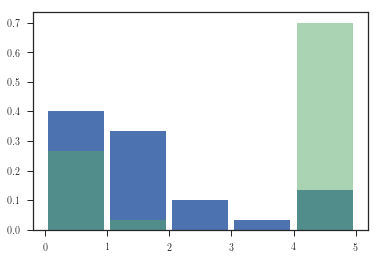

In [219]:
mask = []
i = 0
for yt in y_test:
    yp = y_pred_nc[i]
    mv = yp==yt
    mask.append(mv)
    i +=1
mask = np.invert(mask)

missed_pat_nc = X_test_nc[mask]
missed_pat_diag_nc = y_test_nc[mask]

a,b,c = plt.hist(missed_pat_diag_nc, bins=bins, density=True,rwidth=0.9)
d,e,f = plt.hist(y_pred_nc[mask],bins=bins,density=True,rwidth=0.9,alpha=0.5)

In [221]:
missed_pat_id_nc = X_test_nc[mask,-1]

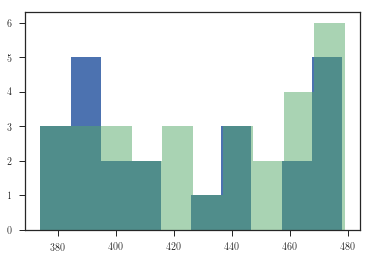

In [222]:
a,b,c = plt.hist(missed_pat_id)
d,e,f = plt.hist(missed_pat_id_nc, alpha=0.5)

In [223]:
#Hmm. This doesn't really seem to be doing what we'd expect. But, what *would* we expect? Right now we'd just expect
#the 'CMalaria' value of the patients that are misdiagnosed to often be 1.

In [225]:
CMmask = missed_pat_nc[:,0]==1
CMmask_all = X_test_nc[:,0]==1
count = 0
call = 0
for m in CMmask:
    if m:
        count += 1
for m in CMmask_all:
    if m:
        call += 1
print float(count)/len(CMmask), float(call)/len(CMmask_all)

0.2 0.2375


In [ ]:
#Well. There are actually *fewer* of the missed patients who are diagnosed with malaria than the overall patients.
#What else might be an indicator? What if we train with more patients - does this overemphasize CMalaria?
#No.

#Ok. What if we take all of the patients with CMalaria, then sort into 'malaria' and 'not malaria,' but using
#the other clinical criteria. How does that do?

#(In theory, you could do the same thing for each of the clinical diagnoses.)